In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from scipy import stats


## Loading the Dataset

In [ ]:
excel_file = pd.ExcelFile('/content/Data Assignment.xlsx')

sheet1_df = pd.read_excel(excel_file, 'ABC')
sheet2_df = pd.read_excel(excel_file, 'XYZ')
sheet3_df = pd.read_excel(excel_file, 'KLM')


In [ ]:
print(sheet1_df.shape)
print(sheet2_df.shape)
print(sheet3_df.shape)

(82, 3)
(61, 3)
(124, 3)


In [ ]:
sheet1_df["Associate"]="ABC"
sheet2_df["Associate"]="XYZ"
sheet3_df["Associate"]="KLM"

In [ ]:
# Combine all three DataFrames into one
combined_df = pd.concat([sheet1_df, sheet2_df, sheet3_df], ignore_index=True)


## Data Exploration

In [ ]:
combined_df

,Date,Leads,Time_Spent,Associate
0,2023-01-09,2.0,300.0,ABC
1,2023-01-10,1.0,300.0,ABC
2,2023-01-11,5.0,300.0,ABC
3,2023-01-12,4.0,300.0,ABC
4,2023-01-13,5.0,300.0,ABC
...,...,...,...,...
262,2023-05-08,10.0,420.0,KLM
263,2023-05-09,9.0,540.0,KLM
264,2023-05-10,8.0,360.0,KLM
265,2023-05-11,12.0,420.0,KLM


In [ ]:
combined_df.shape

(267, 4)

In [ ]:
#data profiling
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        267 non-null    datetime64[ns]
 1   Leads       199 non-null    float64       
 2   Time_Spent  206 non-null    float64       
 3   Associate   267 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 8.5+ KB


In [ ]:
#summary statics
combined_df.describe()

,Leads,Time_Spent
count,199.000000,206.000000
mean,9.195980,358.067961
std,4.273099,125.856113
min,0.000000,0.000000
25%,6.000000,300.000000
50%,10.000000,360.000000
75%,12.500000,420.000000
max,23.000000,600.000000


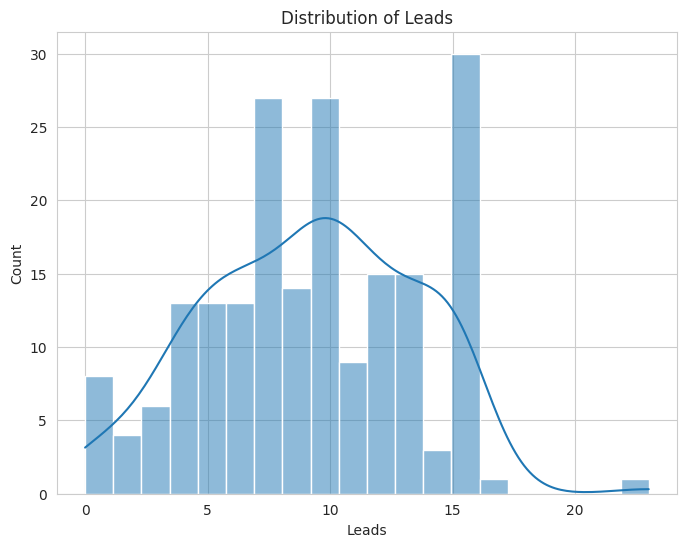

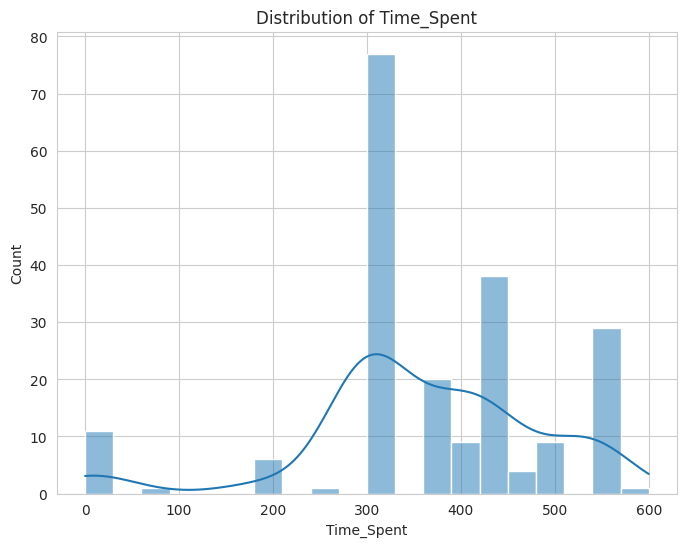

In [ ]:
# Create histograms for numeric columns to check the distribution
numeric_columns = combined_df.select_dtypes(include=['float64'])
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=combined_df, x=column, bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

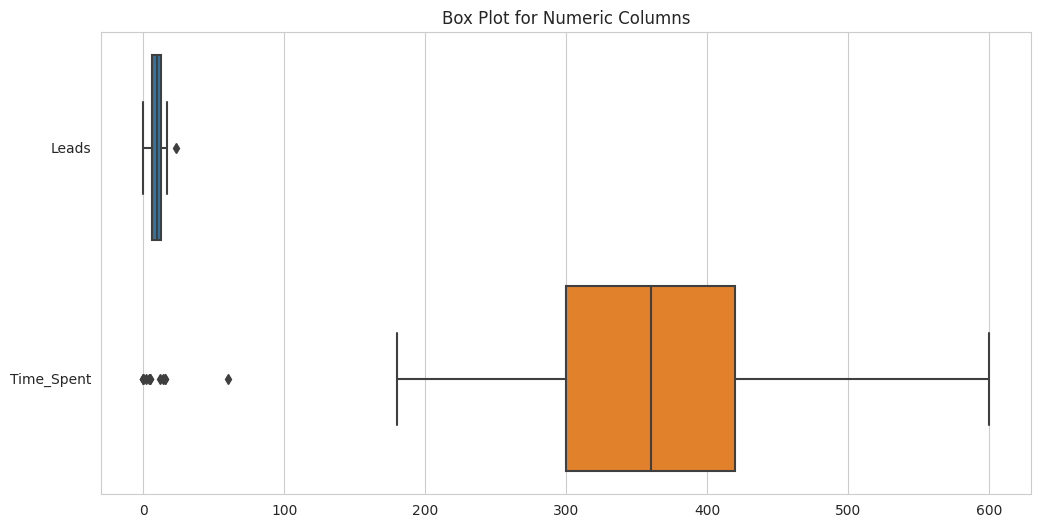

In [ ]:
# Outlier Detection with Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_columns, orient="h")
plt.title('Box Plot for Numeric Columns')
plt.show()

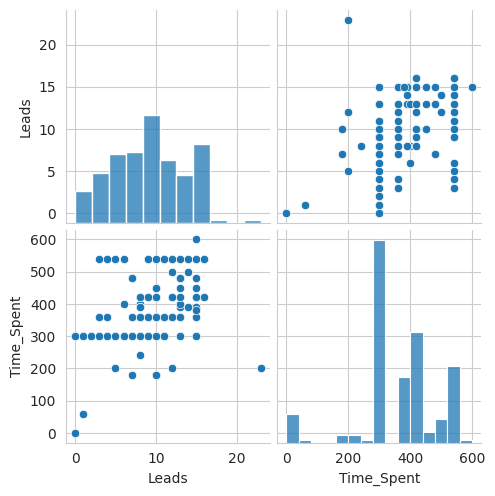

In [ ]:
# Outlier Detection with Scatter Plots
# Create scatter plots for numeric columns against each other
sns.pairplot(data=combined_df, vars=numeric_columns.columns, kind='scatter')
plt.show()

In [ ]:
# Duplicate Records
duplicates = combined_df.duplicated().sum()
print(duplicates)

6


In [ ]:
combined_df=combined_df.drop_duplicates()

<ipython-input-60-104608098f55>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combined_df.corr()


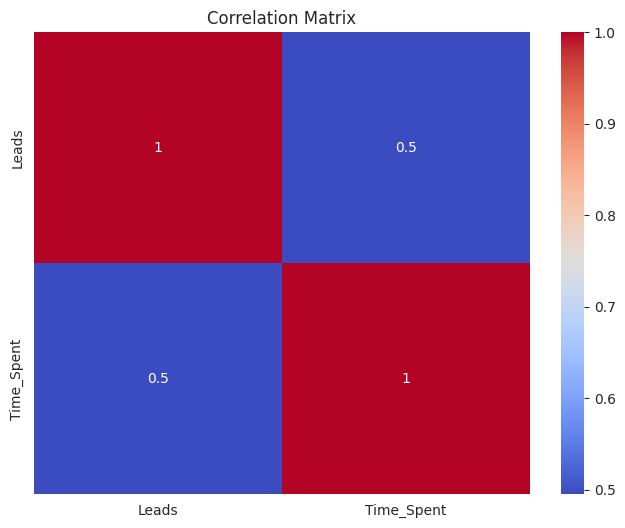

In [ ]:
# Correlation Analysis
correlation_matrix = combined_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
for column in combined_df.columns:
    counts = combined_df[column].value_counts()
    print(f"Value Counts for Column: {column}")
    print(counts)
    print("-" * 20)

Value Counts for Column: Date
2023-01-30    4
2023-01-24    4
2023-02-01    4
2023-02-02    4
2023-01-27    4
             ..
2023-04-05    1
2023-04-06    1
2023-04-07    1
2023-04-08    1
2023-05-12    1
Name: Date, Length: 124, dtype: int64
--------------------
Value Counts for Column: Leads
10.0    27
15.0    27
7.0     15
13.0    15
12.0    15
9.0     14
5.0     13
4.0     13
6.0     13
8.0     12
11.0     9
3.0      6
0.0      5
2.0      4
14.0     3
1.0      3
16.0     3
23.0     1
17.0     1
Name: Leads, dtype: int64
--------------------
Value Counts for Column: Time_Spent
300.0    77
420.0    38
540.0    29
360.0    19
480.0     7
390.0     5
450.0     4
400.0     4
0.0       3
200.0     3
180.0     3
500.0     2
5.0       2
15.0      2
600.0     1
240.0     1
4.0       1
14.0      1
2.0       1
12.0      1
60.0      1
380.0     1
Name: Time_Spent, dtype: int64
--------------------
Value Counts for Column: Associate
KLM    124
ABC     76
XYZ     61
Name: Associate, dtype: int6

## Feature Engineering

In [ ]:
# Handling Missing Values
missing_values = combined_df.isnull().sum()
print(missing_values)

Date           0
Leads         62
Time_Spent    55
Associate      0
dtype: int64


In [ ]:
# Define a function to impute missing data using forward fill
def impute_with_ffill(column, other_column):
    # Conditionally impute if the current column has missing data and the other column has a value
    mask = combined_df[column].isnull() & combined_df[other_column].notnull()
    combined_df[column] = combined_df[column].fillna(method='ffill',limit=3)

# Impute 'Leads' using forward fill if 'Time_Spent' has a value
impute_with_ffill('Leads', 'Time_Spent')

# Impute 'Time_Spent' using forward fill if 'Leads' has a value
impute_with_ffill('Time_Spent', 'Leads')

# Display the updated DataFrame
print(combined_df.isna().sum())

Date          0
Leads         8
Time_Spent    3
Associate     0
dtype: int64


<ipython-input-63-e807f665f9d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df[column] = combined_df[column].fillna(method='ffill',limit=3)


In [ ]:
# dropping the missing values
combined_df.dropna(axis=0,inplace=True)


<ipython-input-64-3ccde71cb13f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df.dropna(axis=0,inplace=True)


In [ ]:
combined_df.info()
combined_df.to_excel("data_emp.xlsx")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 266
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        251 non-null    datetime64[ns]
 1   Leads       251 non-null    float64       
 2   Time_Spent  251 non-null    float64       
 3   Associate   251 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 9.8+ KB


## key performance indicators (KPIs) for each employee

In [ ]:
# Calculate KPIs per employee
employee_kpis = combined_df.groupby('Associate').agg({
    'Date': 'count',  # Total working days
    'Leads': 'mean',  # Average Leads Generated per day
    'Time_Spent': 'mean',  # Average Time Spent per day
})

# Conversion Rate (Leads Generated per hour)
employee_kpis['Conversion_Rate'] = (employee_kpis['Leads'] / (employee_kpis['Time_Spent'] / 60)).round(2)

# Rename columns for clarity
employee_kpis = employee_kpis.rename(columns={
    'Date': 'Total_Working_Days',
    'Leads': 'Average_Leads_Per_Day',
    'Time_Spent': 'Average_Time_Spent_Per_Day'
})

# Total Leads Generated over the given time period
total_leads = combined_df.groupby('Associate')['Leads'].sum()
employee_kpis['Total_Leads_Generated'] = total_leads

# Print the KPIs per employee
print(employee_kpis)

           Total_Working_Days  Average_Leads_Per_Day  \
Associate                                              
ABC                        69               6.014493   
KLM                       121               9.826446   
XYZ                        61              11.229508   

           Average_Time_Spent_Per_Day  Conversion_Rate  Total_Leads_Generated  
Associate                                                                      
ABC                        319.739130             1.13                  415.0  
KLM                        394.545455             1.49                 1189.0  
XYZ                        396.885246             1.70                  685.0  


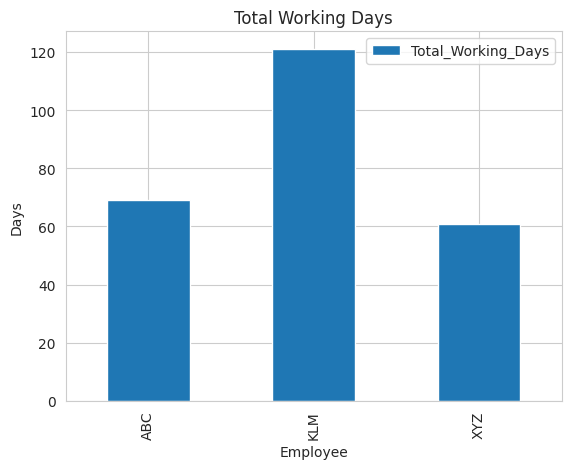

In [ ]:
# Create bar plots to visualize the KPIs
employee_kpis.plot(kind='bar', y='Total_Working_Days', title='Total Working Days')
plt.xlabel('Employee')
plt.ylabel('Days')
plt.show()

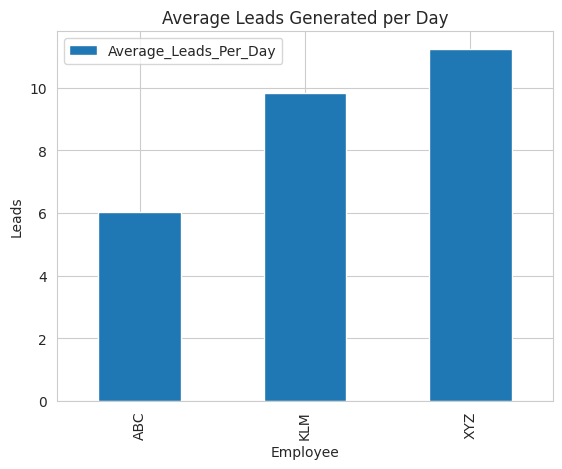

In [ ]:
employee_kpis.plot(kind='bar', y='Average_Leads_Per_Day', title='Average Leads Generated per Day')
plt.xlabel('Employee')
plt.ylabel('Leads')
plt.show()


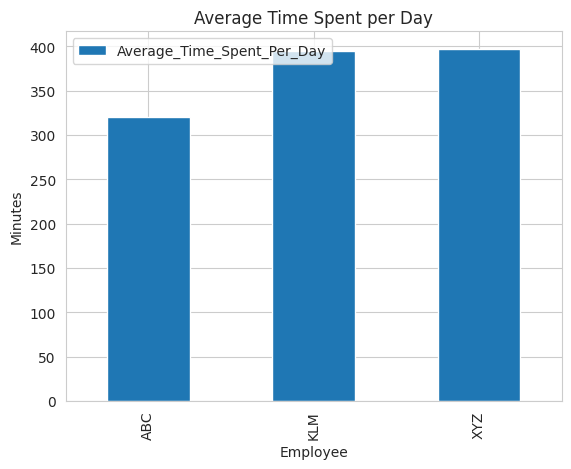

In [ ]:

employee_kpis.plot(kind='bar', y='Average_Time_Spent_Per_Day', title='Average Time Spent per Day')
plt.xlabel('Employee')
plt.ylabel('Minutes')
plt.show()


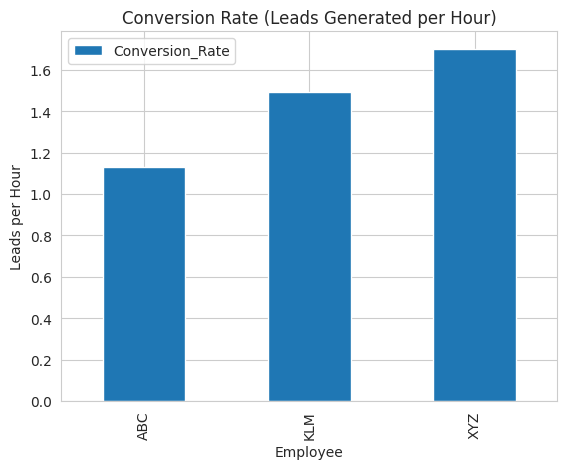

In [ ]:

employee_kpis.plot(kind='bar', y='Conversion_Rate', title='Conversion Rate (Leads Generated per Hour)')
plt.xlabel('Employee')
plt.ylabel('Leads per Hour')
plt.show()


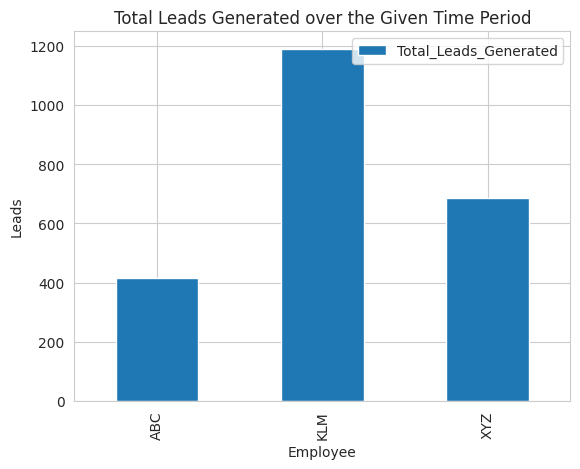

In [ ]:

employee_kpis.plot(kind='bar', y='Total_Leads_Generated', title='Total Leads Generated over the Given Time Period')
plt.xlabel('Employee')
plt.ylabel('Leads')
plt.show()

## Time Series Ananlysis

In [ ]:
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df.set_index('Date', inplace=True)

<ipython-input-72-4710f1d406a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Date'] = pd.to_datetime(combined_df['Date'])


In [ ]:
duplicate_rows = combined_df[combined_df.index.duplicated(keep='first')]
print(duplicate_rows)

            Leads  Time_Spent Associate
Date                                   
2023-01-23   10.0       540.0       ABC
2023-01-24    8.0       400.0       ABC
2023-01-25    8.0       400.0       ABC
2023-01-26    8.0       400.0       ABC
2023-01-27    6.0       400.0       ABC
...           ...         ...       ...
2023-03-06   15.0       540.0       KLM
2023-03-07   15.0       540.0       KLM
2023-03-08   12.0       540.0       KLM
2023-03-09   16.0       540.0       KLM
2023-03-10   15.0       480.0       KLM

[130 rows x 3 columns]


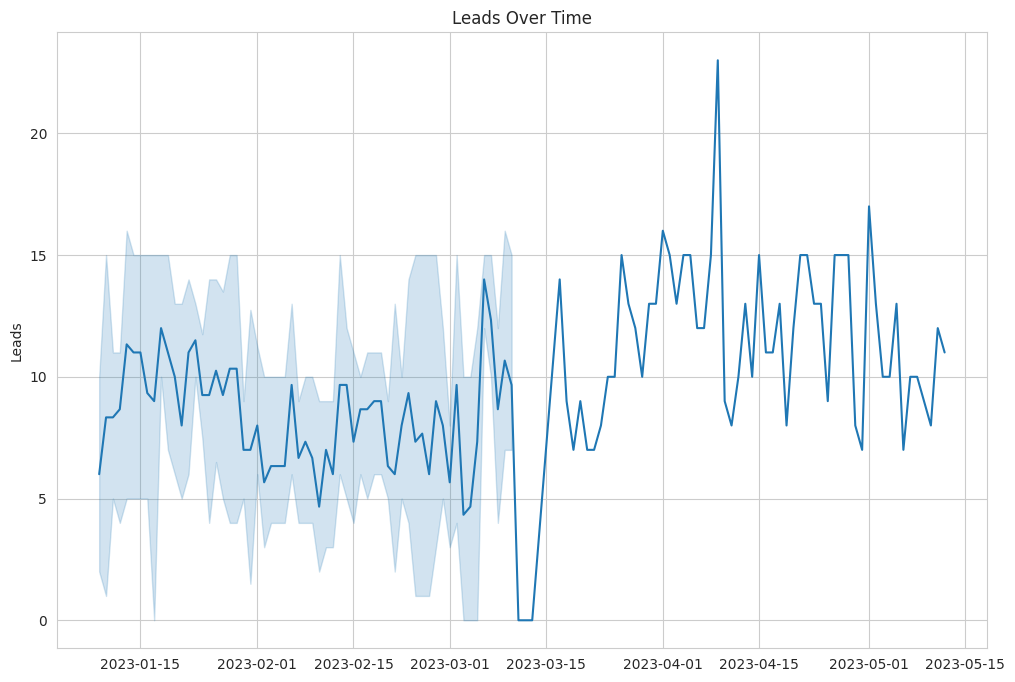

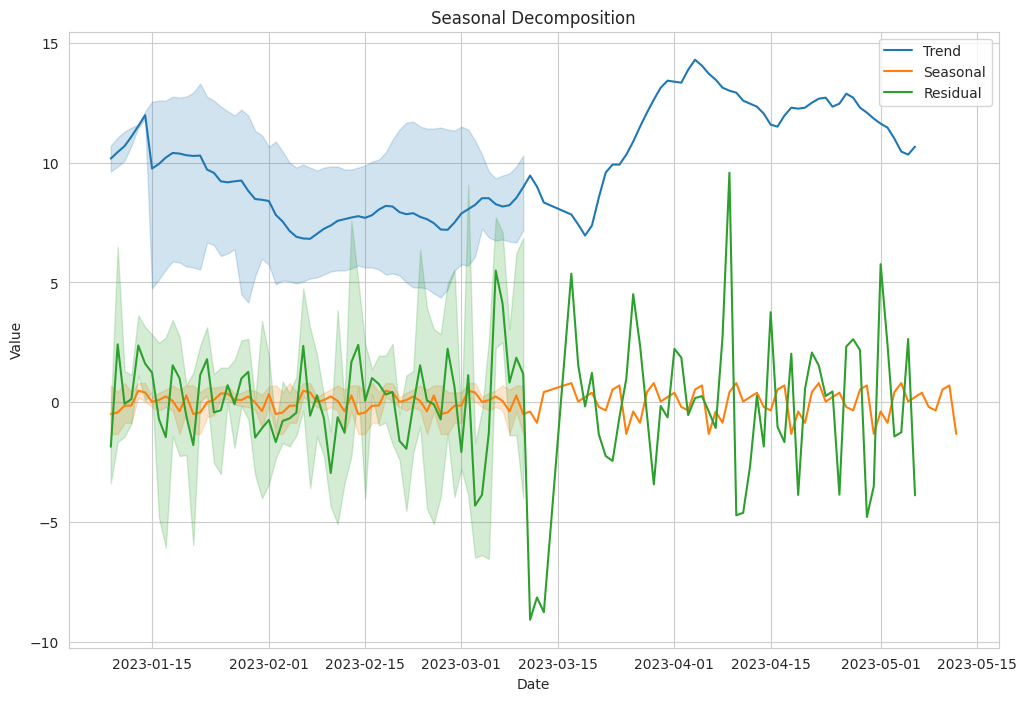

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the style of the plot using seaborn
sns.set_style("whitegrid")

# Time series plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=combined_df, x=combined_df.index, y='Leads')
plt.title('Leads Over Time')
plt.xlabel('')
plt.ylabel('Leads')
plt.show()

# Seasonality decomposition using statsmodels
result = seasonal_decompose(combined_df['Leads'], model='additive', period=12)

# Plot the decomposition components using seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=result.trend, label='Trend')
sns.lineplot(data=result.seasonal, label='Seasonal')
sns.lineplot(data=result.resid, label='Residual')
plt.title('Seasonal Decomposition')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(combined_df['Leads'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
    print('Data is stationary')
else:
    print('Data is non-stationary')


ADF Statistic: -4.218653324799033
p-value: 0.0006125984405466762
Data is stationary


In [ ]:
# from statsmodels.tsa.arima.model import ARIMA

# # Split the data into training and testing sets
# train_size = int(len(combined_df) * 0.8)
# train, test = combined_df.iloc[:train_size], combined_df.iloc[train_size:]

# # Fit an ARIMA model
# model = ARIMA(train['Leads'], order=(1, 1, 1))
# model_fit = model.fit()


In [ ]:
# from sklearn.metrics import mean_absolute_error

# predictions = model_fit.forecast(steps=len(test))
# mae = mean_absolute_error(test['Leads'], predictions)
# print('MAE:', mae)


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Split the data into training and testing sets
train_size = int(len(combined_df) * 0.8)
train, test = combined_df.iloc[:train_size], combined_df.iloc[train_size:]

# Fit a SARIMA model
order = (1, 1, 0)  # (p, d, q) for non-seasonal part
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, s) for seasonal part (e.g., monthly data with s=12 for yearly seasonality)
model = SARIMAX(train['Leads'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


                                      SARIMAX Results                                       
Dep. Variable:                                Leads   No. Observations:                  200
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -532.461
Date:                              Thu, 26 Oct 2023   AIC                           1072.923
Time:                                      05:38:27   BIC                           1085.847
Sample:                                           0   HQIC                          1078.160
                                              - 200                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2908      0.066     -4.420      0.000      -0.420      -0.162
ar.S.L12       0.03

In [ ]:
from sklearn.metrics import mean_absolute_error
predictions = model_fit.forecast(steps=len(test))
mae = mean_absolute_error(test['Leads'], predictions)
print('MAE:', mae)

MAE: 4.3887726852356135


In [ ]:
# Convert predicted mean to actual predictions
actual_predictions = predictions * test['Leads'].std() - test['Leads'].mean()

# Print the actual predictions
print(actual_predictions)


200    12.241598
201    14.429815
202     7.291862
203     7.438085
204     5.703644
205     8.824022
206    15.085607
207    11.289015
208    12.660155
209    12.509868
210    10.055898
211     9.187572
212    12.719193
213    14.528565
214     7.287712
215     8.827215
216     7.041789
217    10.256617
218    15.406903
219    11.959722
220    13.558613
221    13.217743
222    10.875088
223     9.980332
224    13.530829
225    15.328670
226     8.084685
227     9.666596
228     7.879618
229    11.097320
230    16.213781
231    12.777236
232    14.383059
233    14.036388
234    11.697121
235    10.801561
236    14.352632
237    16.150122
238     8.906042
239    10.489244
240     8.702218
241    11.920008
242    17.035440
243    13.599218
244    15.205252
245    14.858405
246    12.519241
247    11.623656
248    15.174745
249    16.972224
250     9.728141
Name: predicted_mean, dtype: float64


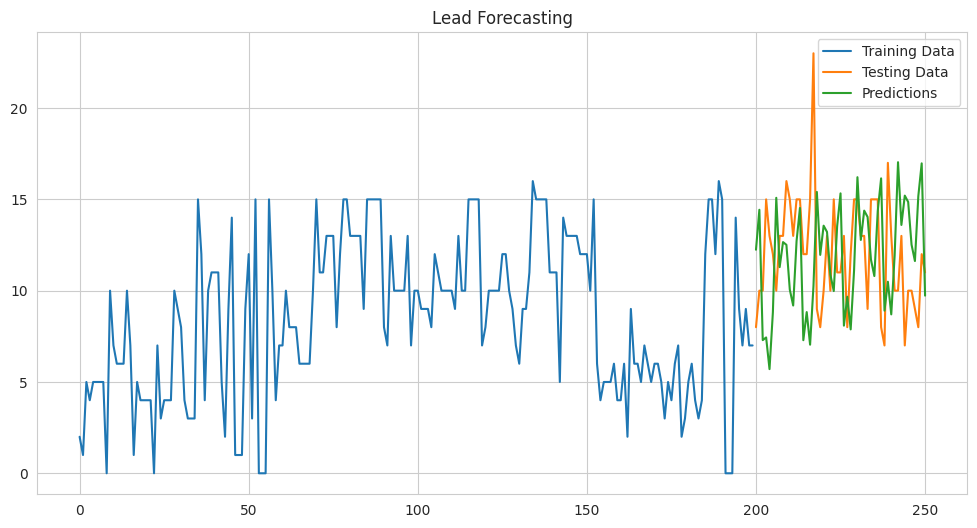

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Leads'], label='Training Data')
plt.plot(test.index, test['Leads'], label='Testing Data')
plt.plot(test.index, actual_predictions, label='Predictions')
plt.legend()
plt.title('Lead Forecasting')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


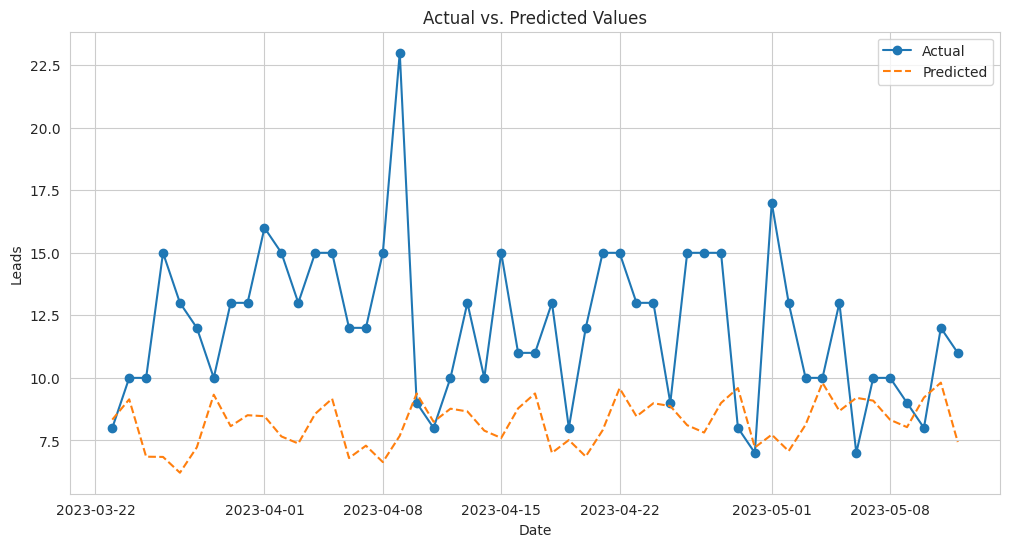

In [ ]:
# Generate predictions for the test set
predictions = model_fit.get_forecast(steps=len(test))
predicted_values = predictions.predicted_mean

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Leads'], label='Actual', marker='o')
plt.plot(test.index, predicted_values, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Leads')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


In [ ]:
print( model_fit.get_prediction(steps=len(test)))

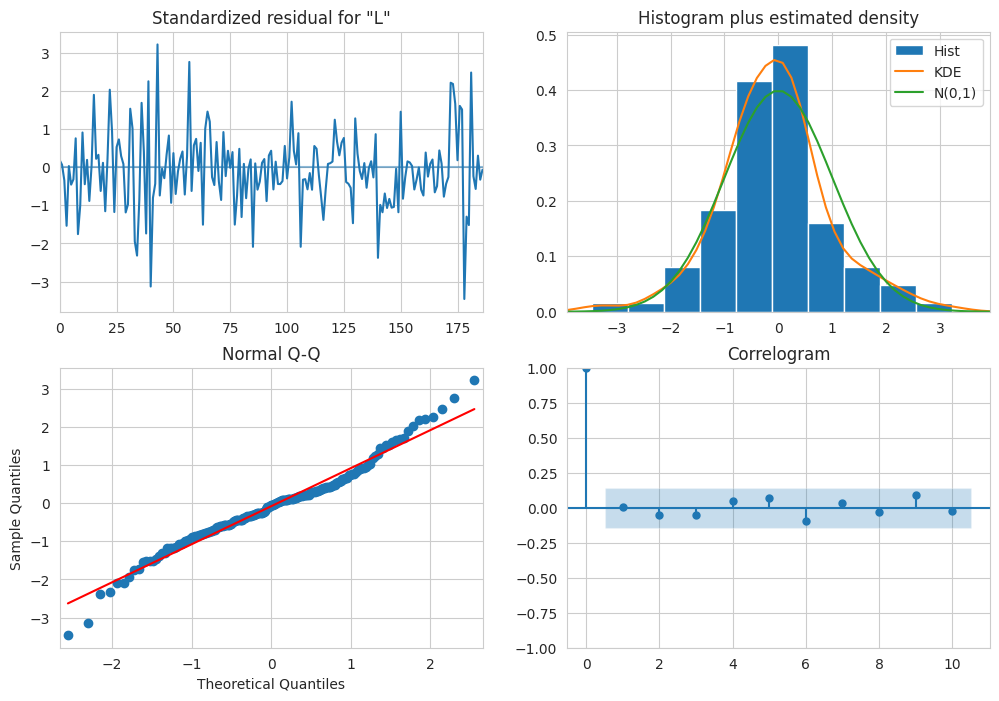

In [ ]:
# Model diagnostics plot
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()


In [ ]:
# Make a forecast for the next month (assuming daily data)
forecast_steps = 30  # 30 days for the next month
forecast = model_fit.get_forecast(steps=forecast_steps)

# Get the forecasted values and confidence intervals
forecasted_values = forecast.predicted_mean
forecasted_ci = forecast.conf_int()

# Display the forecasted values and confidence intervals
print("Forecasted Values:")
print(forecasted_values)

Forecasted Values:
200    8.329694
201    9.142480
202    6.848552
203    6.839166
204    6.207816
205    7.225352
206    9.327768
207    8.069061
208    8.507306
209    8.467061
210    7.658840
211    7.375881
212    8.563679
213    9.167171
214    6.794615
215    7.289567
216    6.632490
217    7.683685
218    9.376096
219    8.246011
220    8.768130
221    8.657637
222    7.890433
223    7.597732
224    8.780645
225    9.376932
226    7.001670
227    7.513982
228    6.856020
229    7.908373
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
#confidence intervals for the forecast
forecasted_data = model_fit.get_forecast(steps=30)
confidence_intervals = forecasted_data.conf_int()
print(confidence_intervals)


     lower Leads  upper Leads
200     1.351564    15.307824
201     1.468129    16.816831
202    -1.057260    14.754363
203    -1.199508    14.877841
204    -1.931804    14.347435
205    -1.009375    15.460080
206     1.001673    17.653863
207    -0.346518    16.484641
208     0.003483    17.011128
209    -0.123998    17.058121
210    -1.018551    16.336231
211    -1.386995    16.138758
212    -0.397075    17.524433
213     0.078363    18.255979
214    -2.401649    15.990880
215    -2.007402    16.586537
216    -2.760141    16.025122
217    -1.802799    17.170170
218    -0.203098    18.955290
219    -1.424927    17.916950
220    -0.993667    18.529927
221    -1.194174    18.509448
222    -2.050582    17.831448
223    -2.431716    17.627180
224    -1.402854    18.964144
225    -0.920850    19.674714
226    -3.398096    17.401435
227    -2.984141    18.012105
228    -3.738277    17.450317
229    -2.777576    18.594322


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
#summary DataFrame that includes the point forecasts, standard errors, and other statistics.
forecasted_data = model_fit.get_forecast(steps=30)
forecast_summary = forecasted_data.summary_frame()
print(forecast_summary)

Leads      mean   mean_se  mean_ci_lower  mean_ci_upper
200    8.329694  3.560336       1.351564      15.307824
201    9.142480  3.915557       1.468129      16.816831
202    6.848552  4.033652      -1.057260      14.754363
203    6.839166  4.101440      -1.199508      14.877841
204    6.207816  4.152943      -1.931804      14.347435
205    7.225352  4.201469      -1.009375      15.460080
206    9.327768  4.248086       1.001673      17.653863
207    8.069061  4.293742      -0.346518      16.484641
208    8.507306  4.338765       0.003483      17.011128
209    8.467061  4.383274      -0.123998      17.058121
210    7.658840  4.427322      -1.018551      16.336231
211    7.375881  4.470937      -1.386995      16.138758
212    8.563679  4.571897      -0.397075      17.524433
213    9.167171  4.637232       0.078363      18.255979
214    6.794615  4.692058      -2.401649      15.990880
215    7.289567  4.743439      -2.007402      16.586537
216    6.632490  4.792247      -2.760141      16

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## Ananlysis

In [ ]:
combined_df.reset_index(drop=False, inplace=True)


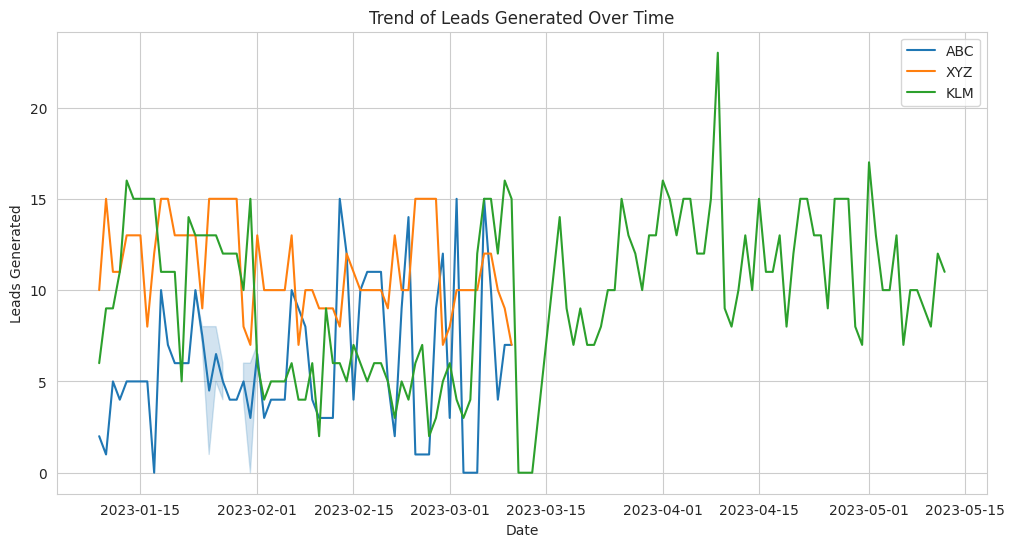

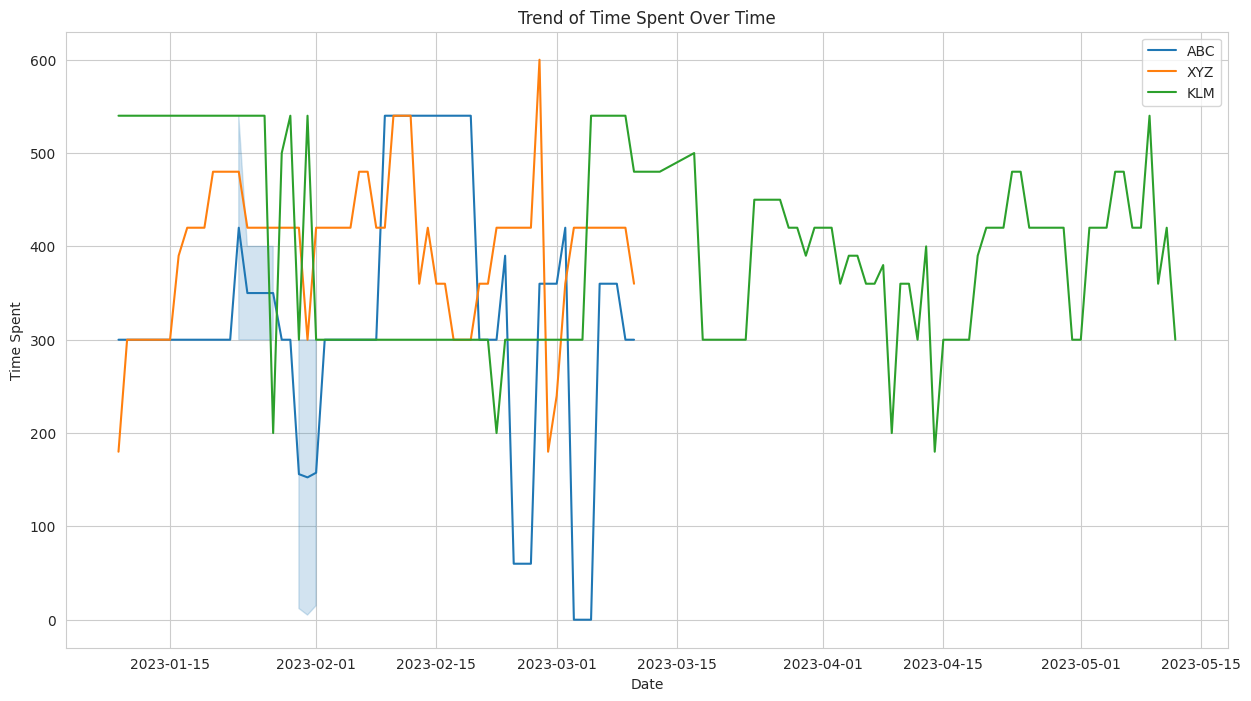

In [ ]:
# Plot the trend of leads generated over time
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Use a white grid background
for employee in combined_df['Associate'].unique():
    employee_data = combined_df[combined_df['Associate'] == employee]
    sns.lineplot(x='Date', y='Leads', data=employee_data, label=employee)
plt.xlabel('Date')
plt.ylabel('Leads Generated')
plt.title('Trend of Leads Generated Over Time')
plt.legend()
plt.show()

# Plot the trend of time spent over time
plt.figure(figsize=(15, 8))
for employee in combined_df['Associate'].unique():
    employee_data = combined_df[combined_df['Associate'] == employee]
    sns.lineplot(x='Date', y='Time_Spent', data=employee_data, label=employee)
plt.xlabel('Date')
plt.ylabel('Time Spent')
plt.title('Trend of Time Spent Over Time')
plt.legend()
plt.show()
